# Image Filters

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import lena

int32


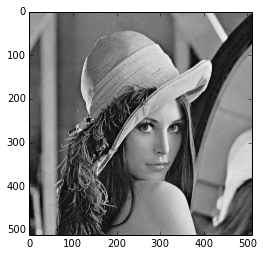

In [5]:
i = lena()
print i.dtype # int32
plt.imshow(i, cmap='gray')

# 2D convolution

In [6]:
from scipy.ndimage.filters import convolve

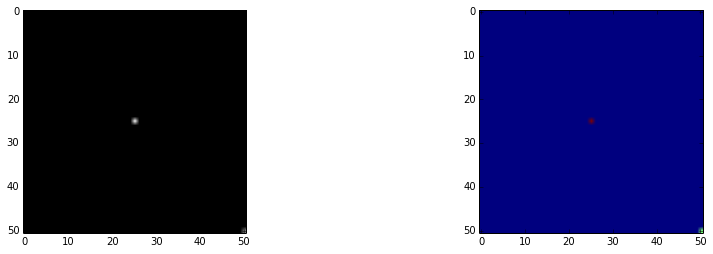

In [7]:
kernel_ghost = np.zeros((51, 51))
kernel_ghost[25,25] = 1
kernel_ghost[50,50] = 0.5
plt.subplot(121)
plt.imshow(kernel_ghost, cmap='gray')
plt.subplot(122)
plt.imshow(kernel_ghost)

plt.gcf().set_figwidth(15)

<matplotlib.colorbar.Colorbar instance at 0x07B67788>

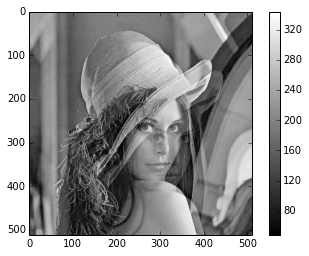

In [8]:
ghost = convolve(i[:,:], kernel_ghost)
plt.imshow(ghost, cmap='gray')
plt.colorbar()

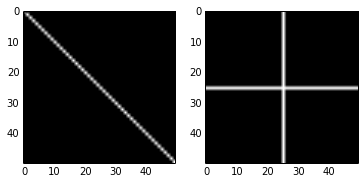

In [9]:
plt.subplot(121)
kernel_stamp = np.zeros((50,50))
kernel_stamp[np.arange(50), np.arange(50)] = 1.0
plt.imshow(kernel_stamp, cmap='gray')

plt.subplot(122)
kernel_stamp = np.zeros((50,50))
kernel_stamp[25,:] = 1.0
kernel_stamp[:,25] = 1.0
plt.imshow(kernel_stamp, cmap='gray')

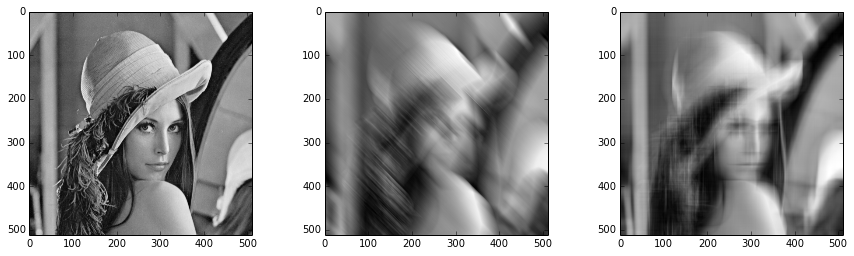

In [10]:
plt.subplot(131)
src_image = i[:,:]
plt.imshow(src_image, cmap='gray')

plt.subplot(132)
kernel_stamp = np.zeros((50,50))
kernel_stamp[np.arange(50), np.arange(50)] = 1.0
stamp = convolve(src_image, kernel_stamp)
plt.imshow(stamp, cmap='gray')

plt.subplot(133)
kernel_stamp = np.zeros((50,50))
kernel_stamp[25,:] = 1.0
kernel_stamp[:,25] = 1.0
stamp = convolve(src_image, kernel_stamp)
plt.imshow(stamp, cmap='gray')

plt.gcf().set_figwidth(15)

# Gaussian Filter

In [11]:
import scipy.ndimage as nd

<matplotlib.colorbar.Colorbar instance at 0x0CCA8D50>

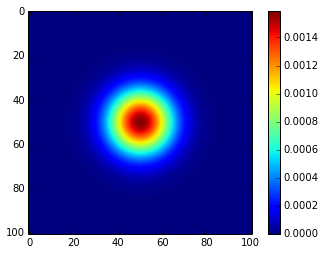

In [12]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 10) # 半徑10?
plt.imshow(gauss_kernel)
plt.colorbar()

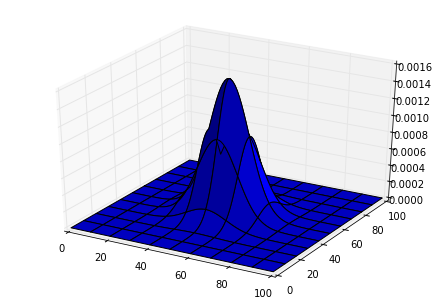

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig) # create a 3D model
x, y = np.mgrid[0:101, 0:101]
ax.plot_surface(x,y,gauss_kernel)
fig.add_axes(ax)

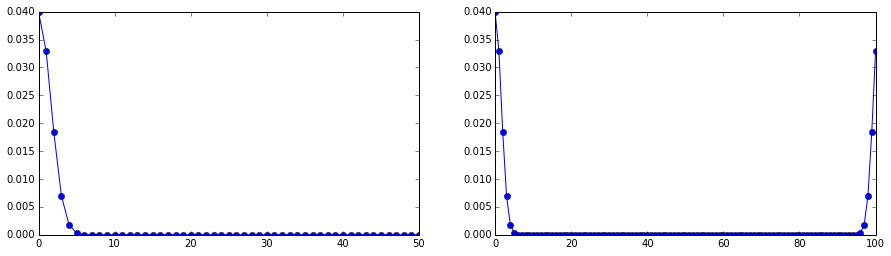

In [14]:
plt.subplot(121)
plt.plot(abs(np.fft.rfft(gauss_kernel[:,50])), 'o-') # real fft

plt.subplot(122)
plt.plot(abs(np.fft.fft(gauss_kernel[:,50])), 'o-')

plt.gcf().set_figwidth(15)

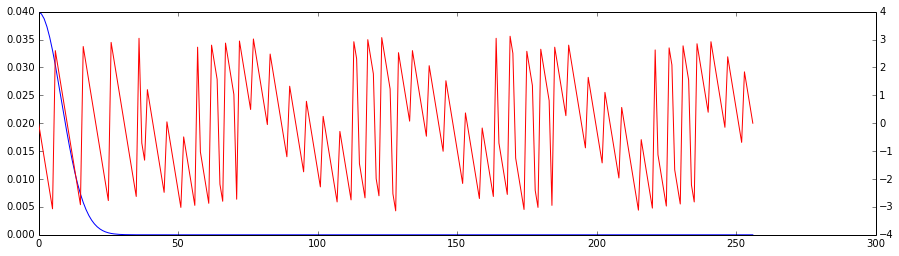

In [15]:
plt.plot(abs(np.fft.rfft(gauss_kernel[:, 50], n=512))) # only real part, so ~256
plt.twinx() # two y-axis

plt.plot(np.angle(np.fft.rfft(gauss_kernel[:, 50], n=512)), 'r')
plt.gcf().set_figwidth(15)

http://docs.scipy.org/doc/numpy/reference/routines.fft.html

    * low pass filter

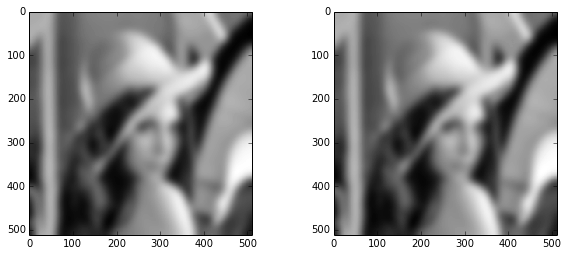

In [16]:
gauss_blur = convolve(src_image, gauss_kernel)

plt.subplot(121)
plt.imshow(gauss_blur, cmap='gray', interpolation= 'nearest')

plt.subplot(122)
plt.imshow(nd.gaussian_filter(src_image, 10), cmap='gray', interpolation='nearest')
#same result
plt.gcf().set_figwidth(10)

# Median Filter

In [17]:
def imshowshort(img):
    plt.imshow(img, cmap='gray')

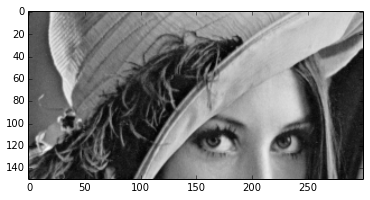

In [18]:
src_image_eyes = src_image[150:300, 100:400]
imshowshort(src_image_eyes)

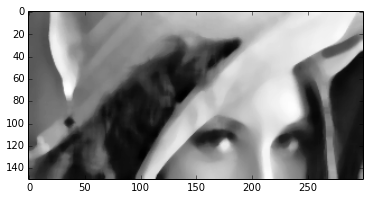

In [19]:
meye = nd.median_filter(src_image_eyes, size=10) # larger num more blur
imshowshort(meye)

(150, 300)


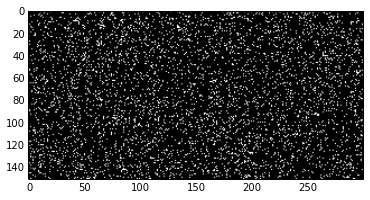

In [20]:
print src_image_eyes.shape
noise = np.where(np.random.random(src_image_eyes.shape) > 0.9,0.8,0) # 0.5,0 ?
imshowshort(noise)

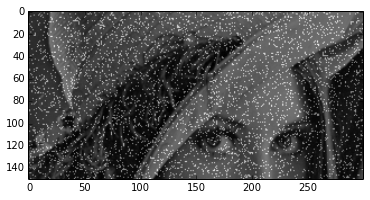

In [21]:
noisy_image = (src_image_eyes/255.0) + noise
imshowshort(noisy_image)

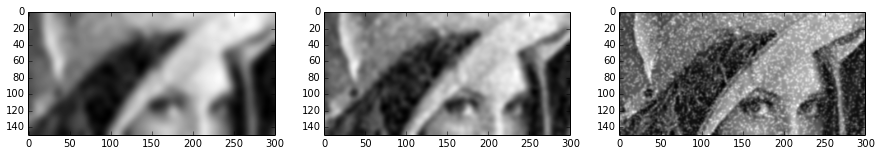

In [22]:
plt.subplot(131)
imshowshort(nd.gaussian_filter(noisy_image, 5))

plt.subplot(132)
imshowshort(nd.gaussian_filter(noisy_image, 3))

plt.subplot(133)
imshowshort(nd.gaussian_filter(noisy_image, 1))

plt.gcf().set_figwidth(15)

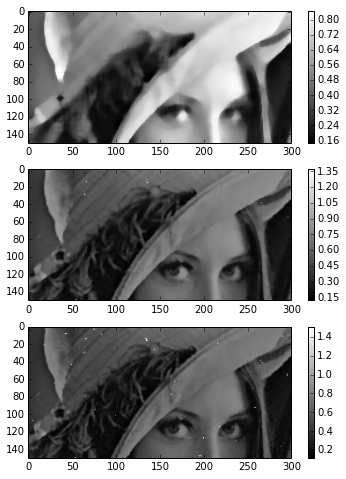

In [23]:
plt.subplot(311)
imshowshort(nd.median_filter(noisy_image, 10))
plt.colorbar()

plt.subplot(312)
imshowshort(nd.median_filter(noisy_image, 4))
plt.colorbar()

plt.subplot(313)
imshowshort(nd.median_filter(noisy_image, 3))
plt.colorbar()

plt.gcf().set_figheight(8)

# Sharpening / Gauss_highpass

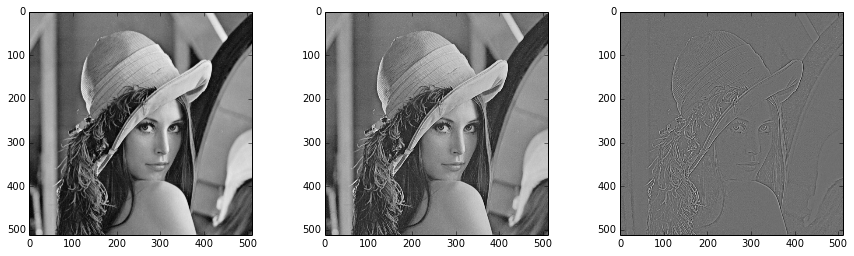

In [24]:
plt.subplot(131)
imshowshort(src_image)
# gauss_highpass = original_data - gauss_lowpass
plt.subplot(132)
igf = nd.gaussian_filter(src_image, 1)
igf = src_image - igf*0.5
imshowshort(igf)

plt.subplot(133)
igf = nd.gaussian_filter(src_image, 1)
igf = src_image - igf
imshowshort(igf)

plt.gcf().set_figwidth(15)

# Sobel operator

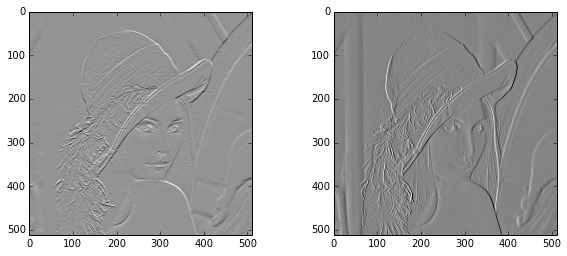

In [25]:
sx = nd.sobel(src_image, axis=0)
sy = nd.sobel(src_image, axis=1)

plt.subplot(121)
imshowshort(sx)

plt.subplot(122)
imshowshort(sy)

plt.gcf().set_figwidth(10)

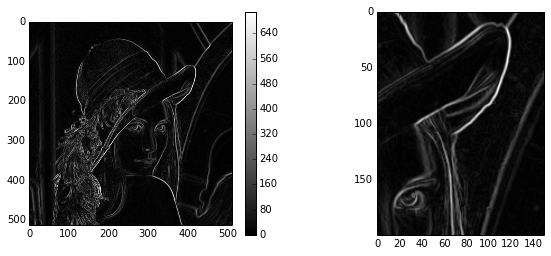

In [26]:
sob = np.hypot(sx, sy) # hypot:sqrt(x*x + y*y)

plt.subplot(121)
imshowshort(sob)
plt.colorbar()

plt.subplot(122)
imshowshort(sob[100:300, 300:450])

plt.gcf().set_figwidth(10)

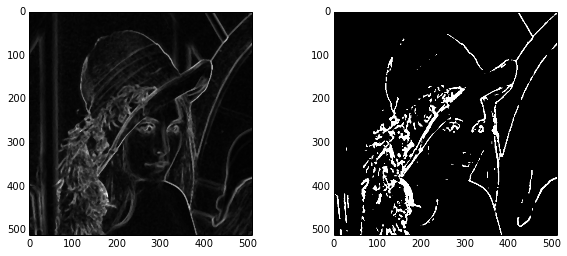

In [27]:
sobmfed1 = nd.median_filter(sob, 5)
sobmfed2 = nd.median_filter((sob> 255 * 0.5), 5)

plt.subplot(121)
imshowshort(sobmfed1)

plt.subplot(122)
imshowshort(sobmfed2)

plt.gcf().set_figwidth(10)